In [1]:
import numpy as np
from classy import Class
from SeparateUniverseGrowthResponse import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import multiprocessing

In [2]:
cls = Class()
cls.set({'output':'mTk, vTk', 'z_pk': 1.e6, 'extra_metric_transfer_functions':'yes'})
cls.compute()

In [3]:
sugr = SeparateUniverseGrowthResponse(cls, quiet = True)

In [4]:
def single_growth_response(k_ind) :
    aa, rr = sugr.getGrowthResponse(k_ind, -12, dloga = 1.e-1, nstep = 100, rtol = 1.e-3, atol = 1.e-9)
    return rr

In [13]:
pool = multiprocessing.Pool(64) # multiprocessing.cpu_count() for all available cores

In [14]:
%%time
skip_k = 2 # only every other wave number
responses = np.array(pool.map(single_growth_response, range(len(sugr.cls.get_transfer(0.)['k (h/Mpc)']))[::skip_k]))
aa = np.exp(np.linspace(-12, 0., 121))

CPU times: user 20.5 ms, sys: 19.8 ms, total: 40.3 ms
Wall time: 436 ms


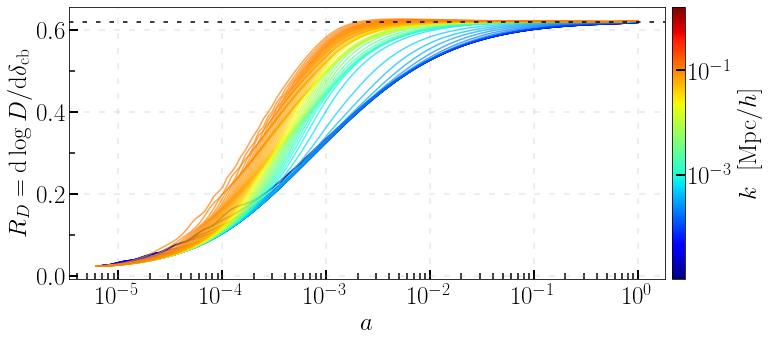

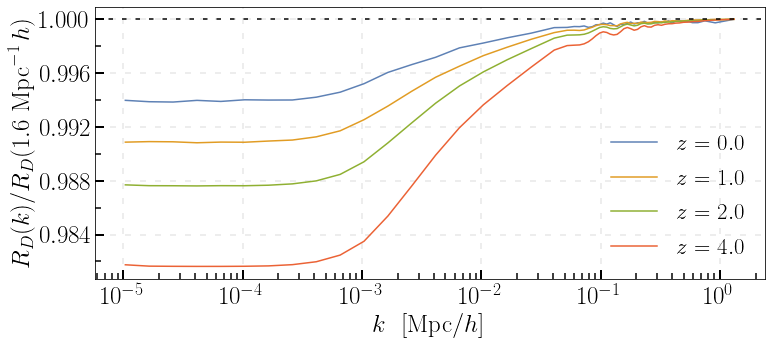

In [15]:
#
# Plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
kk = cls.get_transfer(0.)['k (h/Mpc)']
for tk, tR in zip(kk, responses) :
    logkrat = np.log(tk / kk[0]) / np.log(kk[-1] / kk[0])
    ax.plot(aa, tR,  color = plt.cm.jet(logkrat), alpha = 0.7);
cmap = mpl.cm.jet;
norm = mpl.colors.LogNorm(vmin= kk[0], vmax = kk[-1]);
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical',
             label='$k\ \ [\mathrm{Mpc}/ h]$', fraction = 0.1, pad = 0.01);
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.axhline(13. / 21., color = 'black', dashes = (3, 6));
ax.set_xlabel('$a$')
ax.set_ylabel('$R_D = \mathrm{d} \log D / \mathrm{d} \delta_{\mathrm{cb}}$');
plt.show()
#
# Ratio plots
#
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_xscale('log')
for z_ind in [-1, -8, -12, -17] :
    ax.plot(cls.get_transfer(0.)['k (h/Mpc)'][::skip_k], responses[:, z_ind] / responses[-1, z_ind], label = '$z = %.1f$' % (1. / aa[z_ind] - 1.));
ax.legend();
ax.axhline(1., color = 'black', dashes = (3, 6));
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.004));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.002));
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10, subs=[1.0]));
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, numticks=10, subs=[1., 2., 3., 4., 5., 6., 7., 8., 9.]));
ax.grid(dashes = (4, 6));
ax.set_xlabel('$k\ \ [\mathrm{Mpc}/h]$')
ax.set_ylabel('$R_D(k) / R_D(1.6\ \mathrm{Mpc}^{-1}\, h)$');
plt.show()